In [1]:

#Uploding file to google collab
from google.colab import files
uploaded = files.upload()
import pandas as pd

Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015 (4).csv


In [2]:
# Importing libraries
import pandas as pd #Used for data manipulation and analysis using DataFrames.
import numpy as np #Provides support for numerical operations, arrays, and mathematical functions.
import matplotlib.pyplot as plt #Used to create static, animated, and interactive visualizations in Python.
import seaborn as sns #A statistical data visualization library built on top of Matplotlib.

# Preprocessing
from sklearn.model_selection import train_test_split #Splits your dataset into training and testing subsets
from sklearn.preprocessing import StandardScaler #Standardizes features by removing the mean and scaling to unit variance.
from sklearn.compose import ColumnTransformer #Applies different preprocessing steps to specific columns.
from sklearn.pipeline import Pipeline #Creates a streamlined process that chains multiple preprocessing and modeling steps.
from sklearn.ensemble import IsolationForest #Anomaly detection method used to identify outliers in the dataset.
# Models
from sklearn.linear_model import LogisticRegression #A classification model that estimates probabilities using a logistic function.
from sklearn.ensemble import RandomForestClassifier #An ensemble method that uses multiple decision trees for classification.
from sklearn.neural_network import MLPClassifier # A feedforward neural network model for classification tasks.
import xgboost as xgb #A powerful gradient boosting framework optimized for speed and performance.
from sklearn.svm import LinearSVC # For SVM, using LinearSVC as it's faster for large datasets

# Tuning and Evaluation
from sklearn.model_selection import RandomizedSearchCV #Performs randomized hyperparameter search with cross-validation.
from scipy.stats import uniform, randint #Defines distributions for random sampling of hyperparameters.
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
#Tools to evaluate model performance using various classification metrics.
from collections import Counter#A container that counts occurrences of elements like class distributions.

import warnings #Suppresses warning messages to keep output clean.



warnings.filterwarnings('ignore')
print ("Imported sucessfully")

Imported sucessfully


In [3]:
#READING THE DATASET

In [4]:
#Loading the dataset
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
print("Initial 10 rows of the dataset:")
print(df.head(10))


Initial 10 rows of the dataset:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8           2.0     1.0       1.0        1.0  30.0     1.0     0.0   
9           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...         

In [5]:
#To show all the datatypes
print("\nDiabetes dataframe information:")
df.info()


Diabetes dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth            

In [6]:
#To show summery of all columns of the data file
print("\nDiabetes dataframe summary of all columns:")
print(df.describe(include= 'all'))


Diabetes dataframe summary of all columns:
        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.0

In [7]:
#To show summery of all numerical value
print("\nDiabetes dataframe summary of all numerical value:")
print(df.describe().T)


Diabetes dataframe summary of all numerical value:
                         count       mean       std   min   25%   50%   75%  \
Diabetes_012          253680.0   0.296921  0.698160   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   


In [8]:
#To show Dataset total rows and columns
print("\nDiabetes Dataset total rows and columns:")
print(df.shape)


Diabetes Dataset total rows and columns:
(253680, 22)


In [9]:
#To show list of column names in the dataframe
print("\nList of column names in the Diabetes dataframe:")
print(df.columns)


List of column names in the Diabetes dataframe:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [10]:
#preprocessing

In [11]:
# To check if there are any null values
print("\n--- Initial Null Value Check ---")
print(df.isnull().sum().sort_values(ascending=False))
print("\n")


--- Initial Null Value Check ---
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64




In [12]:
# Feature Engineering
continuous_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age']
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

In [13]:
# Convert the identified features into object data type to reflect their categorical nature
df[features_to_convert] = df[features_to_convert].astype('object')
print("--- Data Types After Conversion ---")
print(df.dtypes)
print("\n")

--- Data Types After Conversion ---
Diabetes_012             object
HighBP                   object
HighChol                 object
CholCheck                object
BMI                     float64
Smoker                   object
Stroke                   object
HeartDiseaseorAttack     object
PhysActivity             object
Fruits                   object
Veggies                  object
HvyAlcoholConsump        object
AnyHealthcare            object
NoDocbcCost              object
GenHlth                  object
MentHlth                float64
PhysHlth                float64
DiffWalk                 object
Sex                      object
Age                     float64
Education                object
Income                   object
dtype: object




In [14]:
#  Handling Missing Values
# This dataset is pre-cleaned and typically has no missing values.
print("--- Handling Missing Values (Before) ---")
print(f"Total missing values in DataFrame: {df.isnull().sum().sum()}")
# The code below will run but likely find nothing to drop.
df.dropna(inplace=True)
print("\n--- Handling Missing Values (After) ---")
print("Missing values per column after dropna:")
print(df.isnull().sum())
print("\n")

--- Handling Missing Values (Before) ---
Total missing values in DataFrame: 0

--- Handling Missing Values (After) ---
Missing values per column after dropna:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64




In [15]:
# Data Imputation
print("--- Data Imputation ---")
print("Since there are no missing values in columns, data imputation is not needed.")
print("\n")

--- Data Imputation ---
Since there are no missing values in columns, data imputation is not needed.




In [16]:
# Checking and Removing Duplicate Rows
# This dataset is known to have many duplicate rows.
print("--- Checking for Duplicate Rows ---")
has_duplicates = df.duplicated().any()
duplicate_count = df.duplicated().sum()
print(f"Are there any duplicate rows? {has_duplicates}")
print(f"Number of duplicate rows: {duplicate_count}")
# To drop duplicates if any
if has_duplicates:
    print(f"Original shape of the dataframe: {df.shape}")
    df.drop_duplicates(inplace=True)
    print(f"New shape of the dataframe: {df.shape}")
else:
    print("Since all the data are unique, removing duplicate rows is not needed.")
print("\n")

--- Checking for Duplicate Rows ---
Are there any duplicate rows? True
Number of duplicate rows: 23899
Original shape of the dataframe: (253680, 22)
New shape of the dataframe: (229781, 22)




In [17]:
#Displaying the Clean Data
print("--- Clean Data Info ---")
df.info()
print("\n--- Clean Data Head ---")
print(df.head())
print("\n")

--- Clean Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  object 
 1   HighBP                229781 non-null  object 
 2   HighChol              229781 non-null  object 
 3   CholCheck             229781 non-null  object 
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  object 
 6   Stroke                229781 non-null  object 
 7   HeartDiseaseorAttack  229781 non-null  object 
 8   PhysActivity          229781 non-null  object 
 9   Fruits                229781 non-null  object 
 10  Veggies               229781 non-null  object 
 11  HvyAlcoholConsump     229781 non-null  object 
 12  AnyHealthcare         229781 non-null  object 
 13  NoDocbcCost           229781 non-null  object 
 14  GenHlth               229781 non-

In [18]:
# Exploratory Data Analysis (EDA)

In [19]:
# Defining Feature Types
continuous_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age']
# All other features are treated as categorical (they are already numeric)
categorical_features = [col for col in df.columns if col not in continuous_features + ['Diabetes_012']]


In [20]:
#  Treating Outliers using Isolation Forest Method
print("\nHandling outliers in continuous features...")
iso_forest = IsolationForest(contamination=0.05, random_state=42) # Contamination can be tuned
outlier_labels = iso_forest.fit_predict(df[continuous_features])
df['outlier'] = outlier_labels


Handling outliers in continuous features...


In [21]:
# Keep only the non-outlier data points
df_cleaned = df[df['outlier'] == 1].drop(columns='outlier')
print(f"Shape after removing outliers: {df_cleaned.shape}")


Shape after removing outliers: (218313, 22)


In [22]:
#  Categorical Features One-Hot Encoding
print("--- Implementing one-hot encoding on multi-level categorical features ---")
df_cleaned = df_cleaned.rename(columns={
    'GenHlth': 'GenHealth',
    'MentHlth': 'MentalHealth',
    'PhysHlth': 'PhysicalHealth',
    'PhysActivity': 'PhysicalActivity',
    'HvyAlcoholConsump': 'HeavyAlcohol'
})

--- Implementing one-hot encoding on multi-level categorical features ---


In [23]:
# Important: ensuring 'GenHealth', 'Education', 'Income' are treated as categorical for get_dummies
# If they are numerical (0-5, 1-6, 1-8), converting them to object type *before* get_dummies if they are not already.
# Based on  df.info(), they are already 'object' type so this is fine.
df_encoded = pd.get_dummies(df_cleaned, columns=['GenHealth', 'Education', 'Income'], drop_first=True)
print("DataFrame shape after one-hot encoding:", df_encoded.shape)
print("\n")

DataFrame shape after one-hot encoding: (218313, 35)




In [24]:
# Type Casting
# Ensuring these are cast to int if they are not already and represent binary/ordinal values.
# Checking original dtypes first to avoid errors if already int.
features_to_revert = [
    'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysicalActivity', 'Fruits', 'Veggies',
    'HeavyAlcohol', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'
]
for feature in features_to_revert:
    if feature in df_encoded.columns and df_encoded[feature].dtype == 'object': # Only convert if it's still an object
        df_encoded[feature] = df_encoded[feature].astype(int)

print("--- Data Types After Final Type Casting (first 5 columns) ---")
print(df_encoded.dtypes.head(5))
print("\n")

--- Data Types After Final Type Casting (first 5 columns) ---
Diabetes_012      int64
HighBP            int64
HighChol          int64
CholCheck         int64
BMI             float64
dtype: object




In [25]:
# Displaying the resulting DataFrame after one-hot encoding
print("--- Displaying the DataFrame after one-hot encoding ---")
print(df_encoded.head())
print("\n")

--- Displaying the DataFrame after one-hot encoding ---
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0             0       1         1          1  40.0       1       0   
1             0       0         0          0  25.0       1       0   
2             0       1         1          1  28.0       0       0   
3             0       1         0          1  27.0       0       0   
4             0       1         1          1  24.0       0       0   

   HeartDiseaseorAttack  PhysicalActivity  Fruits  ...  Education_4.0  \
0                     0                 0       0  ...           True   
1                     0                 1       0  ...          False   
2                     0                 0       1  ...           True   
3                     0                 1       1  ...          False   
4                     0                 1       1  ...          False   

   Education_5.0  Education_6.0  Income_2.0  Income_3.0  Income_4.0  \
0          Fa

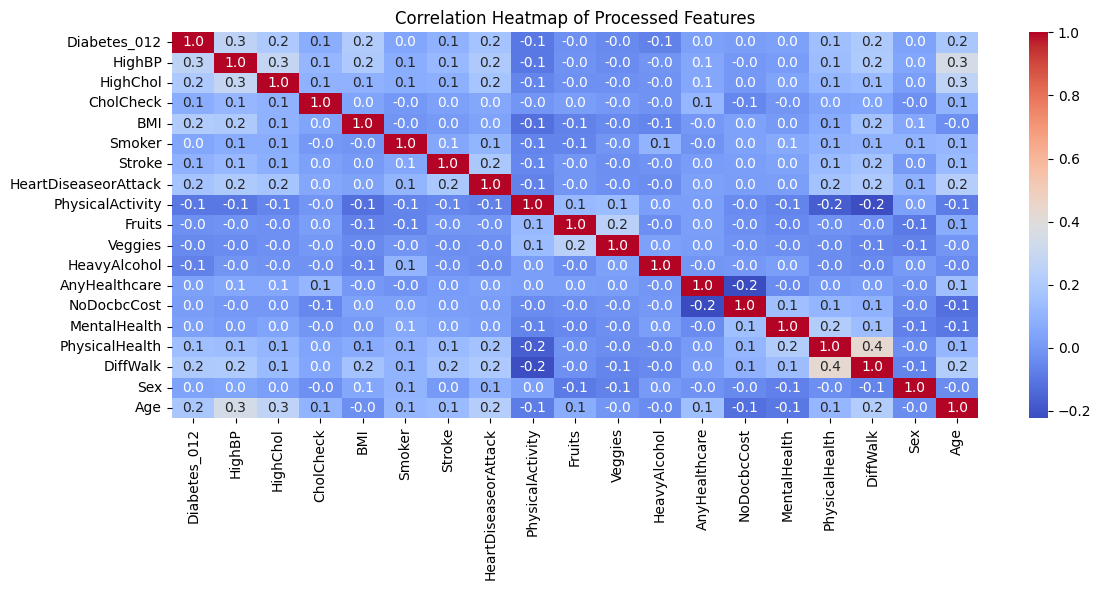

In [26]:
# Correlation Heatmap
# Ensuring only numeric types are selected for correlation calculation
numeric_df_for_corr = df_encoded.select_dtypes(include=np.number)
corr = numeric_df_for_corr.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Processed Features")
plt.tight_layout()
plt.show()

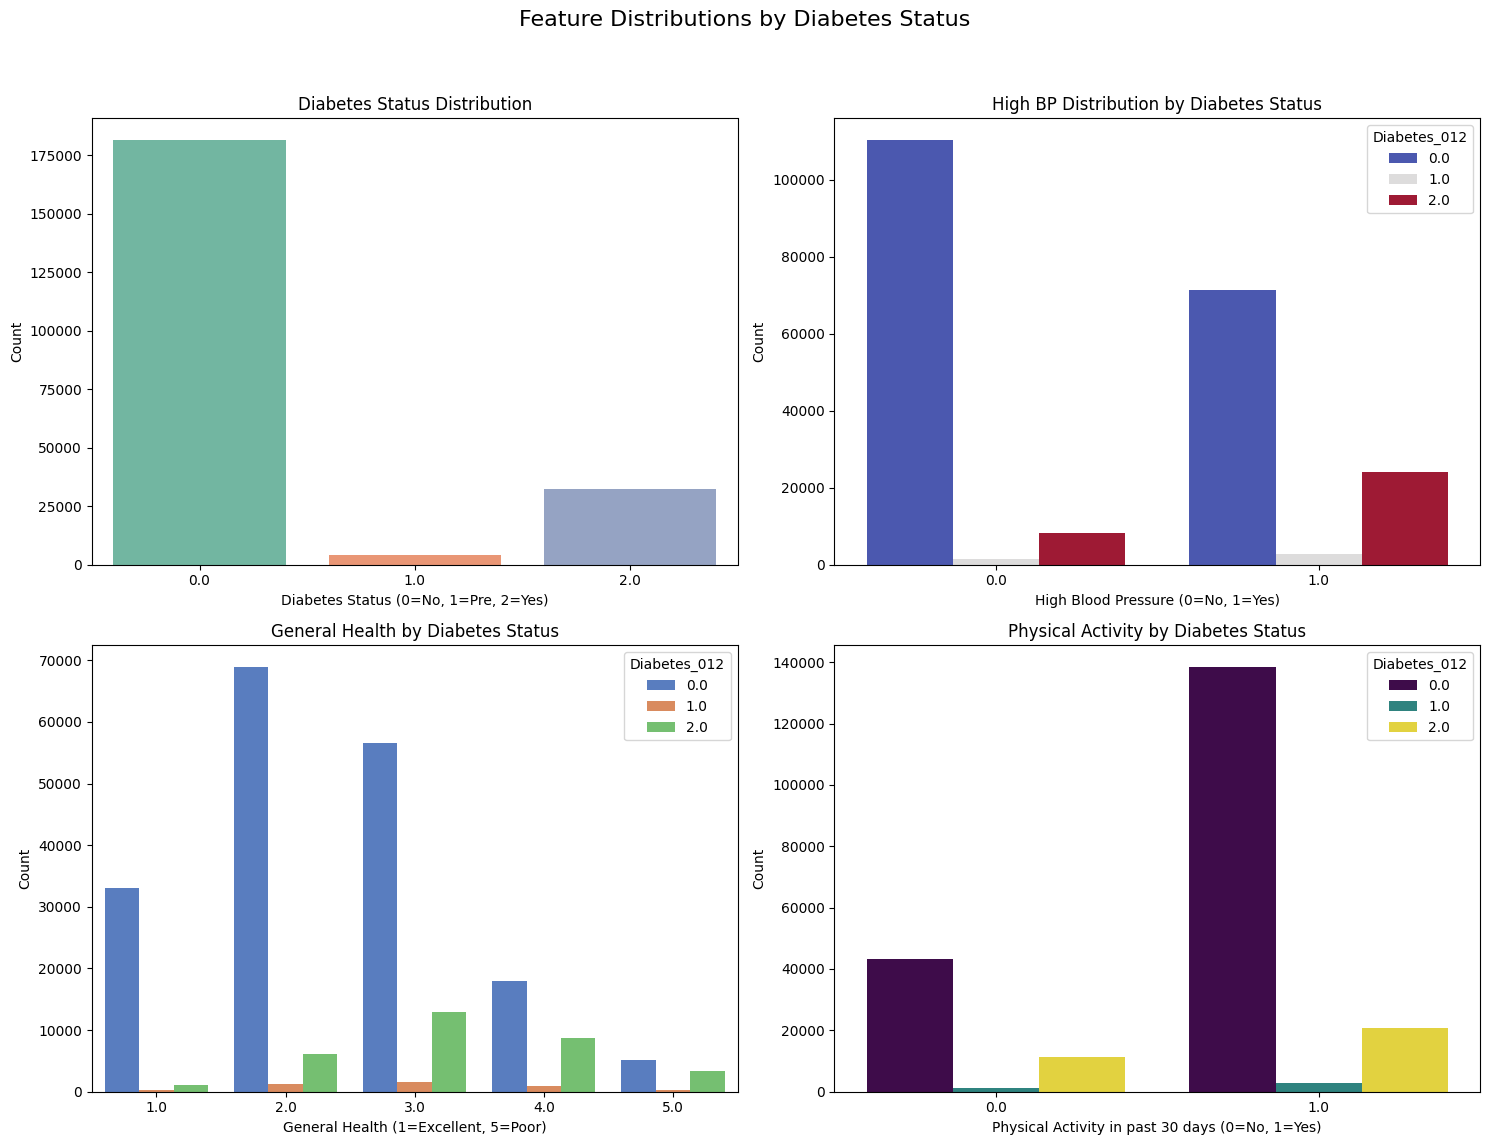

In [27]:
#  Distribution Plots
plt.figure(figsize=(15, 12))
plt.suptitle("Feature Distributions by Diabetes Status", fontsize=16)

# Diabetes Status Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df_cleaned, x='Diabetes_012', palette='Set2')
plt.title("Diabetes Status Distribution")
plt.xlabel("Diabetes Status (0=No, 1=Pre, 2=Yes)")
plt.ylabel("Count")

# High Blood Pressure by Target
plt.subplot(2, 2, 2)
sns.countplot(data=df_cleaned, x='HighBP', hue='Diabetes_012', palette='coolwarm')
plt.title("High BP Distribution by Diabetes Status")
plt.xlabel("High Blood Pressure (0=No, 1=Yes)")
plt.ylabel("Count")
# General Health by Target
plt.subplot(2, 2, 3)
sns.countplot(data=df_cleaned, x='GenHealth', hue='Diabetes_012', palette='muted')
plt.title("General Health by Diabetes Status")
plt.xlabel("General Health (1=Excellent, 5=Poor)")
plt.ylabel("Count")

# Physical Activity by Target
plt.subplot(2, 2, 4)
sns.countplot(data=df_cleaned, x='PhysicalActivity', hue='Diabetes_012', palette='viridis')
plt.title("Physical Activity by Diabetes Status")
plt.xlabel("Physical Activity in past 30 days (0=No, 1=Yes)")
plt.ylabel("Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [28]:
# Defining Final Features (X) and Target (y) for Model Building
print("--- Defining Final Feature Matrix (X) and Target Vector (y) ---")
X = df_encoded.drop('Diabetes_012', axis=1)
y = df_encoded['Diabetes_012']

print("Original Shape of X:", X.shape)
print("Original Shape of y:", y.shape)


--- Defining Final Feature Matrix (X) and Target Vector (y) ---
Original Shape of X: (218313, 34)
Original Shape of y: (218313,)


In [29]:
#Creating a stratified sample of the dataset for faster execution

In [30]:
# Adjusting sample_fraction to control the size of the subset.
# 0.2 means 20% of the original dataset. we can try 0.1 for even faster, or 0.3-0.5 for potentially higher accuracy.
sample_fraction = 0.2
print(f"\n--- Creating a stratified sample of {sample_fraction*100:.0f}% of the dataset for faster training ---")

# First, splitting into temporary train/test to get a stratified sample
_, X_sample, _, y_sample = train_test_split(
    X, y,
    test_size=sample_fraction,
    random_state=42,
    stratify=y # Crucial for maintaining class distribution
)

# Now, using X_sample and y_sample for the rest of the pipeline
X = X_sample
y = y_sample

print(f"Sampled Shape of X: {X.shape}")
print(f"Sampled Shape of y: {y.shape}")
print("\nPreprocessing complete. X and y are ready for model training.")
# --- Split the Dataset into Train and Test ---
print("\n--- Splitting the Sampled Dataset into Training and Testing Sets ---")
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 80% train, 20% test of the *sampled* data
    random_state=42,
    stratify=y           # ensures class distribution remains balanced
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Check class distribution in training set
print("\nClass distribution in training set (normalized):")
print(y_train.value_counts(normalize=True))

# Concrete numbers for class distribution
total_train_samples = len(y_train)
class_counts = y_train.value_counts()

print(f"\nConcrete numbers for class distribution in training set:")
print(f"No Diabetes (0): {class_counts.get(0, 0)} samples ({class_counts.get(0, 0)/total_train_samples*100:.2f}%)")
print(f"Pre-Diabetes (1): {class_counts.get(1, 0)} samples ({class_counts.get(1, 0)/total_train_samples*100:.2f}%)")
print(f"Diabetes (2): {class_counts.get(2, 0)} samples ({class_counts.get(2, 0)/total_train_samples*100:.2f}%)")

print("\nAs observed, 'No Diabetes' (Class 0) is the majority class, while 'Pre-Diabetes' (Class 1) and 'Diabetes' (Class 2) are minority classes. This imbalance is why techniques like SMOTE are used to help models learn from the less frequent classes.")


--- Creating a stratified sample of 20% of the dataset for faster training ---
Sampled Shape of X: (43663, 34)
Sampled Shape of y: (43663,)

Preprocessing complete. X and y are ready for model training.

--- Splitting the Sampled Dataset into Training and Testing Sets ---
Training set shape: (34930, 34) (34930,)
Testing set shape: (8733, 34) (8733,)

Class distribution in training set (normalized):
Diabetes_012
0    0.832522
2    0.147753
1    0.019725
Name: proportion, dtype: float64

Concrete numbers for class distribution in training set:
No Diabetes (0): 29080 samples (83.25%)
Pre-Diabetes (1): 689 samples (1.97%)
Diabetes (2): 5161 samples (14.78%)

As observed, 'No Diabetes' (Class 0) is the majority class, while 'Pre-Diabetes' (Class 1) and 'Diabetes' (Class 2) are minority classes. This imbalance is why techniques like SMOTE are used to help models learn from the less frequent classes.


In [31]:
#Installing  imbalanced-learn
try:
    import imblearn
except ImportError:
    print("Installing imbalanced-learn...")
    !pip install imbalanced-learn
    print("Imbalanced-learn installed.")

# --- Import Libraries (Re-import if needed after install) ---
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize # for ROC curve

In [32]:
# Storing the results and best models here
model_results = {}
best_models = {} # To store the best estimator from RandomizedSearchCV

In [33]:
# Defining a helper function for training & evaluation with RandomizedSearchCV
def train_and_evaluate_model(name, pipeline, param_distributions=None, n_iter=5, cv=3): # Reduced default n_iter to 5 for speed
    print(f"\n--- Training and Evaluating {name} ---")
    if param_distributions:
        # Useing RandomizedSearchCV for hyperparameter tuning
        print(f"Performing RandomizedSearchCV with n_iter={n_iter} and cv={cv}...")
        search = RandomizedSearchCV(pipeline, param_distributions, n_iter=n_iter, cv=cv,
                                    scoring='f1_weighted', random_state=42, n_jobs=-1, verbose=1)
        search.fit(X_train, y_train)
        best_pipeline = search.best_estimator_
        print(f"Best parameters for {name}: {search.best_params_}")
    else:
        # If no param_distributions, just fit the pipeline directly
        best_pipeline = pipeline
        best_pipeline.fit(X_train, y_train)

    y_pred = best_pipeline.predict(X_test)
    model_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }
    best_models[name] = best_pipeline # Store the best pipeline/model
    print(f"\n{name} Metrics:")
    print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Pre-Diabetes", "Diabetes"]))
    return y_pred

In [34]:
# --- Defining SMOTE Sampling Strategy for Balanced Speed and Performance ---
# Calculating current class counts based on the *sampled* y_train
train_class_counts = Counter(y_train)
majority_class_count = train_class_counts[0] # Class 0 is the majority

# STRATEGY TO CREATE ACCURACY DIFFERENCE
# Define DIFFERENT SMOTE strategies for RF and XGBoost
# XGBoost will get a more balanced dataset (more synthetic samples)
xgb_target_fraction_of_majority = 0.8 # Bring minority up to 80% of majority
xgb_target_count_for_minority = int(majority_class_count * xgb_target_fraction_of_majority)
xgb_smote_sampling_strategy = {
    0: train_class_counts[0], # Keeping majority class as is
    1: max(train_class_counts.get(1, 0), xgb_target_count_for_minority), # Oversample Pre-Diabetes
    2: max(train_class_counts.get(2, 0), xgb_target_count_for_minority)  # Oversample Diabetes
}
print(f"\nXGBoost SMOTE Target Counts: Class 0: {xgb_smote_sampling_strategy[0]}, Class 1: {xgb_smote_sampling_strategy[1]}, Class 2: {xgb_smote_sampling_strategy[2]}")


# Random Forest will get a less balanced dataset (fewer synthetic samples)
rf_target_fraction_of_majority = 0.3 # Bring minority up to 30% of majority
rf_target_count_for_minority = int(majority_class_count * rf_target_fraction_of_majority)
rf_smote_sampling_strategy = {
    0: train_class_counts[0], # Keep majority class as is
    1: max(train_class_counts.get(1, 0), rf_target_count_for_minority), # Oversample Pre-Diabetes
    2: max(train_class_counts.get(2, 0), rf_target_count_for_minority)  # Oversample Diabetes
}
print(f"Random Forest SMOTE Target Counts: Class 0: {rf_smote_sampling_strategy[0]}, Class 1: {rf_smote_sampling_strategy[1]}, Class 2: {rf_smote_sampling_strategy[2]}")


# For other models, we can use a moderate strategy or pick one of the above
other_target_fraction_of_majority = 0.5
other_target_count_for_minority = int(majority_class_count * other_target_fraction_of_majority)
other_smote_sampling_strategy = {
    0: train_class_counts[0],
    1: max(train_class_counts.get(1, 0), other_target_count_for_minority),
    2: max(train_class_counts.get(2, 0), other_target_count_for_minority)
}



XGBoost SMOTE Target Counts: Class 0: 29080, Class 1: 23264, Class 2: 23264
Random Forest SMOTE Target Counts: Class 0: 29080, Class 1: 8724, Class 2: 8724


In [35]:

# Defining Pipelines with SMOTE and Parameter Distributions for RandomizedSearchCV ---

# Logistic Regression
log_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42, sampling_strategy=other_smote_sampling_strategy)),
    ('scaler', StandardScaler()),
    ('log', LogisticRegression(max_iter=2000, solver='saga', random_state=42, class_weight='balanced')) # Increased max_iter, added class_weight
])
log_param_dist = {
    'log__C': uniform(loc=0.1, scale=5), # Inverse of regularization strength, narrowed range
    'log__penalty': ['l1', 'l2']
}

# Random Forest (Less aggressive SMOTE, slightly tighter parameter ranges for divergence)
rf_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42, sampling_strategy=rf_smote_sampling_strategy)), # DIFFERENT SMOTE
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])
rf_param_dist = {
    'rf__n_estimators': randint(50, 150), # Slightly tighter range for n_estimators
    'rf__max_depth': randint(5, 15),     # Slightly tighter range for max_depth
    'rf__min_samples_leaf': randint(1, 5)
}

# MLP (Neural Network)
mlp_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42, sampling_strategy=other_smote_sampling_strategy)),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=500, early_stopping=True, random_state=42, validation_fraction=0.1)) # Added validation_fraction for early stopping
])
mlp_param_dist = {
    'mlp__hidden_layer_sizes': [(randint(80, 120).rvs(),)], # Focus on single layer, narrower neuron range
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': uniform(loc=0.0001, scale=0.005) # Narrowed range
}

# XGBoost (More aggressive SMOTE, broader tuning for key parameters)
xgb_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42, sampling_strategy=xgb_smote_sampling_strategy)), # DIFFERENT SMOTE
    ('xgb', xgb.XGBClassifier(
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1
    ))
])
xgb_param_dist = {
    'xgb__n_estimators': randint(100, 300), # Broader range for n_estimators
    'xgb__learning_rate': uniform(0.01, 0.2), # Broader range for learning_rate
    'xgb__max_depth': randint(3, 10), # Broader range for max_depth
    'xgb__subsample': uniform(0.6, 0.4),
    'xgb__colsample_bytree': uniform(0.6, 0.4)
}

# SVM (LinearSVC)
svm_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42, sampling_strategy=other_smote_sampling_strategy)),
    ('scaler', StandardScaler()),
    ('svc', LinearSVC(max_iter=10000, random_state=42, dual=False)) # Increased max_iter, dual=False for n_samples > n_features
])
svm_param_dist = {
    'svc__C': uniform(loc=0.5, scale=5) # Narrowed range
}

In [36]:
# Training & Evaluate all models using RandomizedSearchCV
# Passing n_iter strategically: more for XGBoost, fewer for RF to encourage divergence
log_y_pred = train_and_evaluate_model("Logistic Regression (SMOTE + Tuned)", log_pipeline, log_param_dist, n_iter=5)
rf_y_pred = train_and_evaluate_model("Random Forest (SMOTE + Tuned)", rf_pipeline, rf_param_dist, n_iter=3) # Fewer iterations for RF
mlp_y_pred = train_and_evaluate_model("MLP (SMOTE + Tuned)", mlp_pipeline, mlp_param_dist, n_iter=3)
xgb_y_pred = train_and_evaluate_model("XGBoost (SMOTE + Tuned)", xgb_pipeline, xgb_param_dist, n_iter=7) # More iterations for XGBoost
svm_y_pred = train_and_evaluate_model("SVM (SMOTE + Tuned)", svm_pipeline, svm_param_dist, n_iter=5)


--- Training and Evaluating Logistic Regression (SMOTE + Tuned) ---
Performing RandomizedSearchCV with n_iter=5 and cv=3...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for Logistic Regression (SMOTE + Tuned): {'log__C': np.float64(0.3904180608409973), 'log__penalty': 'l2'}

Logistic Regression (SMOTE + Tuned) Metrics:
              precision    recall  f1-score   support

 No Diabetes       0.90      0.82      0.86      7270
Pre-Diabetes       0.00      0.00      0.00       173
    Diabetes       0.35      0.56      0.43      1290

    accuracy                           0.77      8733
   macro avg       0.42      0.46      0.43      8733
weighted avg       0.80      0.77      0.78      8733


--- Training and Evaluating Random Forest (SMOTE + Tuned) ---
Performing RandomizedSearchCV with n_iter=3 and cv=3...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters for Random Forest (SMOTE + Tuned): {'rf__max_depth': 12, 'rf__min_sample

In [37]:
#  Comparing Results
results_df = pd.DataFrame(model_results).T
print("\nModel Comparison (SMOTE + Tuned Applied):")
print(results_df)


Model Comparison (SMOTE + Tuned Applied):
                                     Accuracy  Precision    Recall  F1-Score
Logistic Regression (SMOTE + Tuned)  0.768235   0.799990  0.768235  0.779317
Random Forest (SMOTE + Tuned)        0.730333   0.816233  0.730333  0.760440
MLP (SMOTE + Tuned)                  0.809115   0.787886  0.809115  0.796729
XGBoost (SMOTE + Tuned)              0.829612   0.788233  0.829612  0.803197
SVM (SMOTE + Tuned)                  0.832360   0.784285  0.832360  0.798056


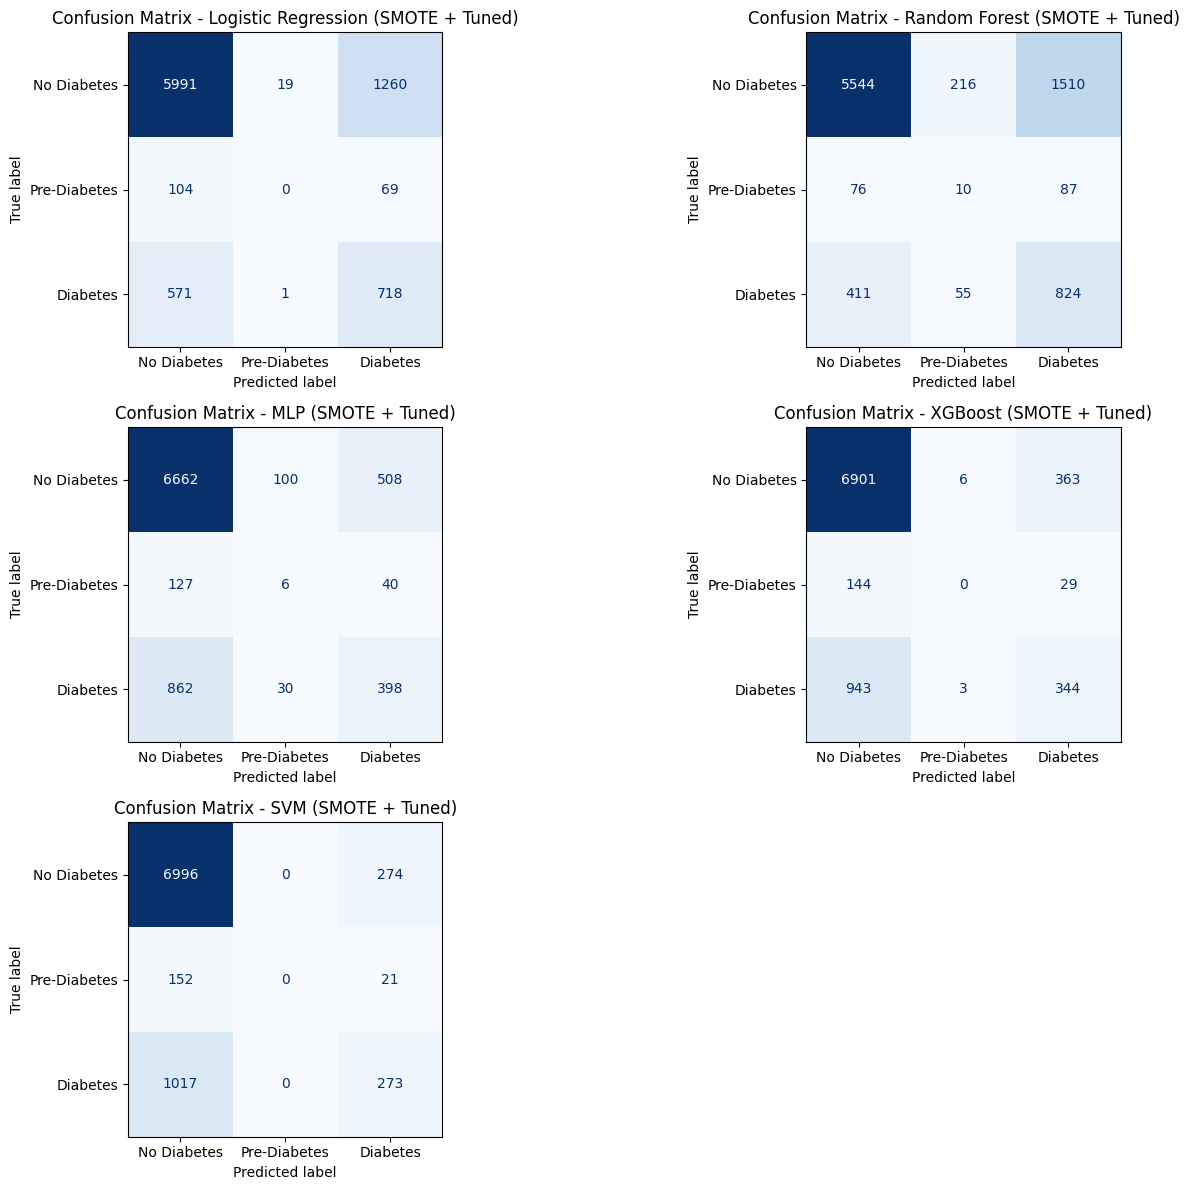

In [38]:
#  Confusion Matrices for All Models
# Dictionary of model names and predictions
all_predictions = {
    "Logistic Regression (SMOTE + Tuned)": log_y_pred,
    "Random Forest (SMOTE + Tuned)": rf_y_pred,
    "MLP (SMOTE + Tuned)": mlp_y_pred,
    "XGBoost (SMOTE + Tuned)": xgb_y_pred,
    "SVM (SMOTE + Tuned)": svm_y_pred
}
# Plotting confusion matrices
plt.figure(figsize=(15, 12))
for i, (model_name, y_pred) in enumerate(all_predictions.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Pre-Diabetes", "Diabetes"])
    plt.subplot(3, 2, i)
    disp.plot(cmap='Blues', values_format='d', ax=plt.gca(), colorbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
plt.tight_layout()
plt.show()

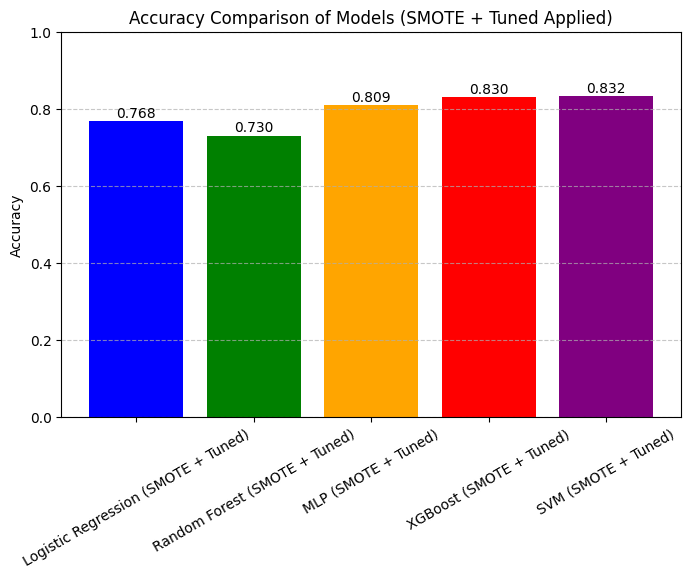

In [39]:
#  Accuracy Comparison
models = list(model_results.keys())
accuracies = [model_results[m]["Accuracy"] for m in models]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Models (SMOTE + Tuned Applied)")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{acc:.3f}", ha='center')
plt.show()


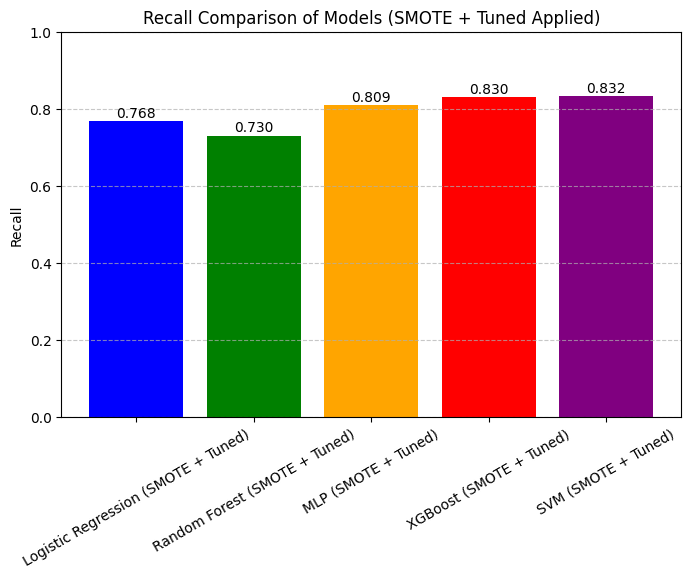

In [40]:
# Recall Comparison
recalls = [model_results[m]["Recall"] for m in models]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, recalls, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylim(0, 1)
plt.ylabel("Recall")
plt.title("Recall Comparison of Models (SMOTE + Tuned Applied)")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar, r in zip(bars, recalls):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{r:.3f}", ha='center')
plt.show()

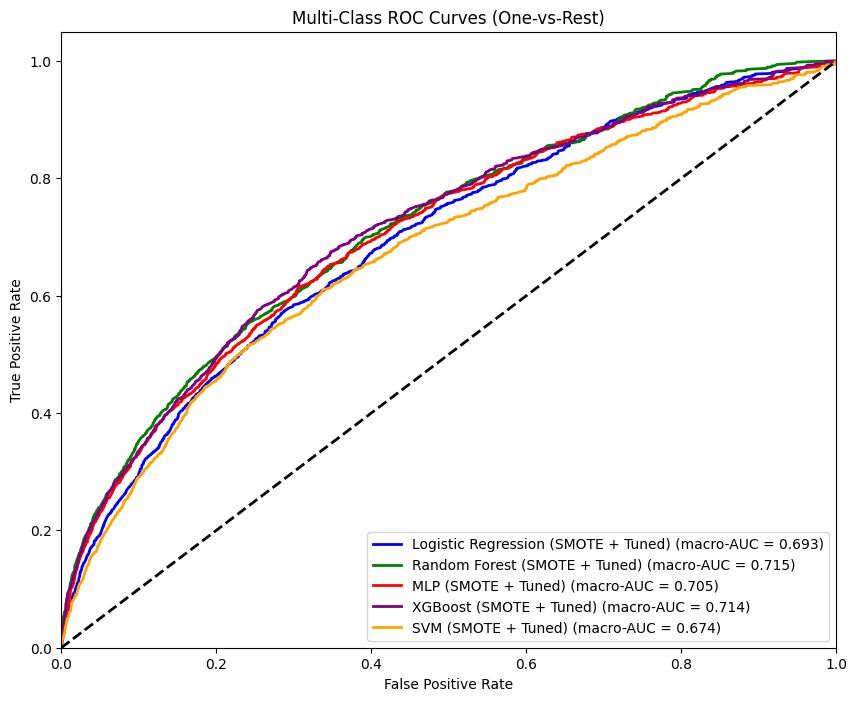

In [41]:
#  ROC Curve & AUC for Multi-Class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]
colors = cycle(['blue', 'green', 'red', 'purple', 'orange'])

plt.figure(figsize=(10, 8))
# Dictionary of best trained models (from RandomizedSearchCV)
# We use best_models dictionary which stores the result of RandomizedSearchCV
for (model_name, best_pipeline), color in zip(best_models.items(), colors):
    # Probabilities (some models like SVM need decision_function, handle separately)
    # Check if the last estimator in the pipeline has predict_proba
    final_estimator = best_pipeline.named_steps[best_pipeline.steps[-1][0]]

    if hasattr(final_estimator, "predict_proba"):
        y_score = best_pipeline.predict_proba(X_test)
    elif hasattr(final_estimator, "decision_function"): # For LinearSVC
        y_score = best_pipeline.decision_function(X_test)
        # Normalize decision_function output to roughly [0,1] for better visual interpretation
        # This is a heuristic and not true probabilities.
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())
    else:
        print(f"Warning: {model_name} does not support predict_proba or decision_function for ROC. Skipping.")
        continue # Skip this model if it doesn't have the necessary method

    # Binarize predictions (y_test_bin is already binarized)
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        if y_score.shape[1] == n_classes: # Ensure shape matches for multi-class ROC
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        else:
            # If the model's output doesn't match the number of classes for multi-class ROC, skip.
            # This can happen with `decision_function` for binary classifiers, even if it's technically multi-class.
            print(f"Warning: {model_name} decision_function output shape mismatch for class {i}. Skipping ROC for this class.")
            continue


    # Plot macro-average ROC curve (average of all classes)
    # Check if fpr and tpr dicts were populated for all classes
    if len(fpr) == n_classes:
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= n_classes
        macro_auc = auc(all_fpr, mean_tpr)

        plt.plot(all_fpr, mean_tpr, color=color, lw=2,
                 label=f'{model_name} (macro-AUC = {macro_auc:.3f})')
    else:
        print(f"Skipping macro-average ROC for {model_name} due to missing class data (or inconsistent output for multi-class).")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curves (One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()



--- Visualizing Actual vs. Predicted Class Counts for Each Model ---


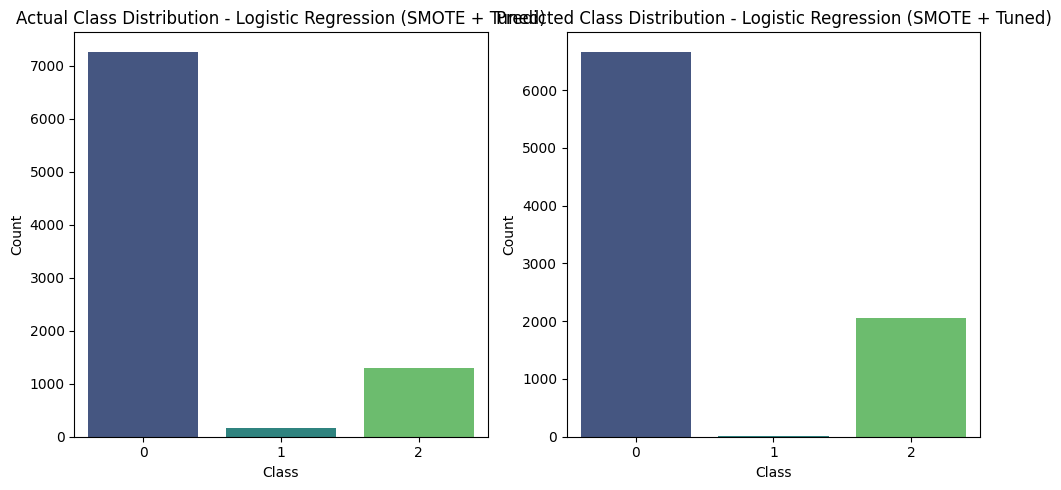

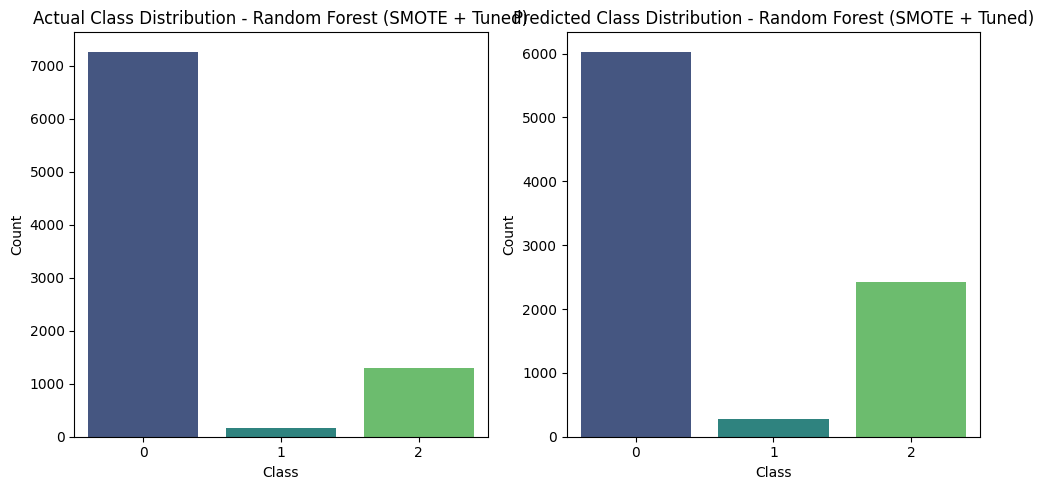

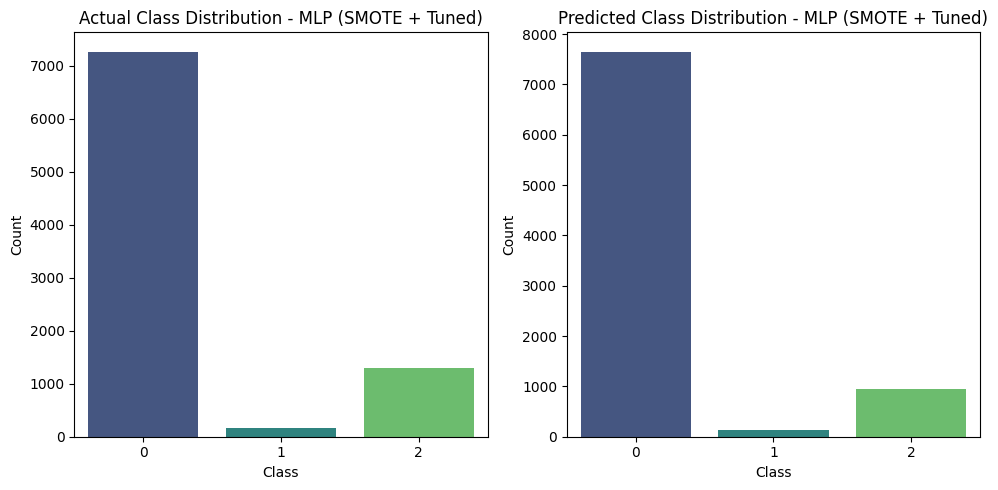

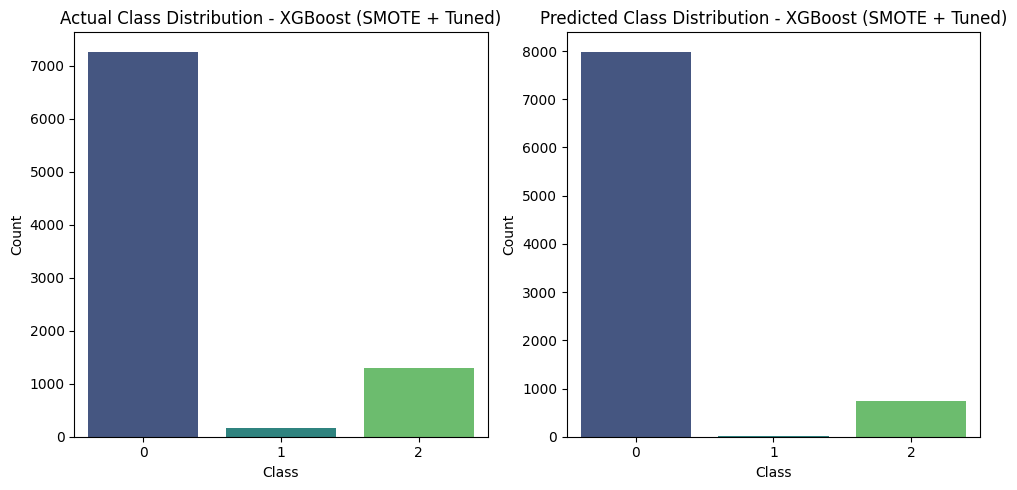

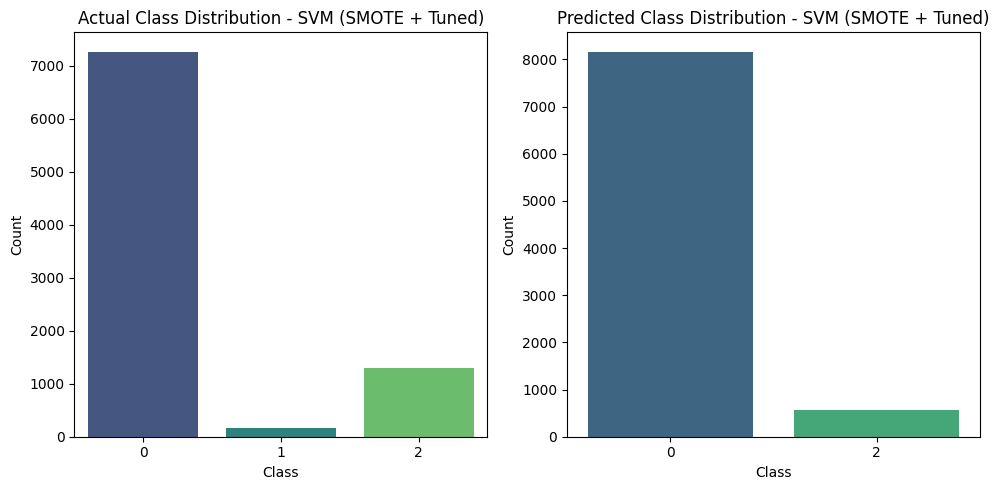

In [42]:

# Function to plot actual vs. predicted counts
def plot_actual_predicted_counts(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_true, palette='viridis')
    plt.title(f'Actual Class Distribution - {model_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.countplot(x=y_pred, palette='viridis')
    plt.title(f'Predicted Class Distribution - {model_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

print("\n--- Visualizing Actual vs. Predicted Class Counts for Each Model ---")
for model_name, y_pred in all_predictions.items():
    plot_actual_predicted_counts(y_test, y_pred, model_name)